## What is linear regression?

- Linear regression is a supervised machine learning algorithm that tries to predict the relationship between a dependent variable and one or more independent variables. 

- Linear regression establishes the relationship between these two variables by fitting the best fit line, also called the regression line.

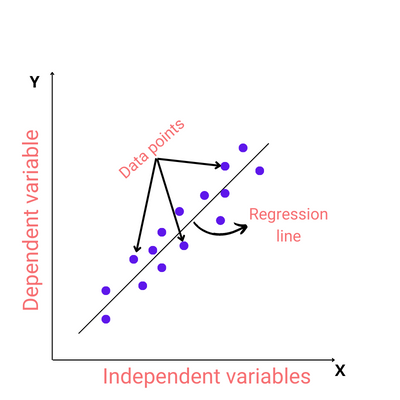

>**The Ordinary Least Squares regression(OLS) is a common technique for estimating linear regression equations coefficients. It fits the linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset and the predicted targets.**

#### Mathematically, we can represent a linear regression as:

y= a0+a1x+ ε

**Where:**

- y is the dependent variable.
- x is the independent variable (predictor variable).
- a0 is the intercept of the line.
- a1 is the linear regression coefficient (scale factor to each input value).
- ε is the random error.

## There are two types of linear regression:

1. Simple linear regression uses only one independent variable to predict a dependent variable.

2. Multiple linear regression is an extension of simple linear regression with multiple independent variables to predict a dependent variable.

## Linear regression assumptions

For successful linear regression, four assumptions must be met. They include:

- There should be a linear relationship between the independent and dependent variables.
- The residuals should be independent, with no correlations between them.
- Residuals should have a constant variance at every level of x.
- Residuals of the model should be normally distributed.

## Modeling in Scikit-learn involves the following steps:

- Loading datasets.
- Splitting the dataset.
- Training the model.

## Loading datasets

Scikit-learn provides example datasets, such as the iris and digits  used for classification, the California housing dataset, and the Ames housing dataset for regression.

### A dataset has two components, namely:

- Features are the variables of the data. Feature names give a list of all the names of the features in the feature matrix – a collection of features commonly represented with 'X'.

- Response/target is the output variable. Target names represent the possible values from a response column(response vector, commonly represented with 'y'). We usually have one response column.

## Splitting datasets

Splitting the dataset is crucial in determining the accuracy of a model. If we were to train the model with the raw dataset and predict the response for the same dataset, the model would suffer flaws like overfitting, thus compromising its accuracy. For this reason, we have to split the data into training and testing sets. This way, we can use the training set to train the model and the test set to test the model.

>**From the example, in the train_test_split function, we have provided:**

- X and y representing the feature matrix and response vector, respectively.
- test_size which represents the ratio of test data(0.3 for 30%) and the total data given.
- random_size indicating that we want the data splitting to be similar every time.

## Training the model

After the dataset is split, we need to train a prediction model. At this stage, we choose a class of a model from the appropriate estimator class in Scikit-learn. For this example, we will use the LinearRegression class.

# Building a simple linear regression model with Scikit-learn

## Loading a sample dataset

In [4]:
import pandas as pd
stud_scores = pd.read_csv('Scores_data.csv.xls')
stud_scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Before building the linear regression model, we must first understand the data:**

In [5]:
stud_scores.shape

(96, 2)

**From the info() method, we can see that both Hours and Scores are numeric, which is crucial for linear regression.**

In [7]:
stud_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   96 non-null     float64
 1   Scores  96 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


**The describe() method will give a statistical overview of the data.**

In [8]:
stud_scores.describe()

,Hours,Scores
count,96.000000,96.000000
mean,5.267708,54.020833
std,2.503030,25.017459
min,1.000000,12.000000
25%,3.075000,30.750000
50%,5.250000,54.500000
75%,7.325000,74.250000
max,9.800000,99.000000


>From here, we can see that the average study time of a student is 5 hours, the minimum score is 17, and the maximum score is 95.

**Check if the data has missing values:**

In [6]:
stud_scores.isnull().sum()

Hours     0
Scores    0
dtype: int64

>From here, We can see there are no missing values.

**Check for correlation and plot a heatmap:**

In [11]:
stud_scores.corr()

,Hours,Scores
Hours,1.00000,0.99064
Scores,0.99064,1.00000


<Axes: >

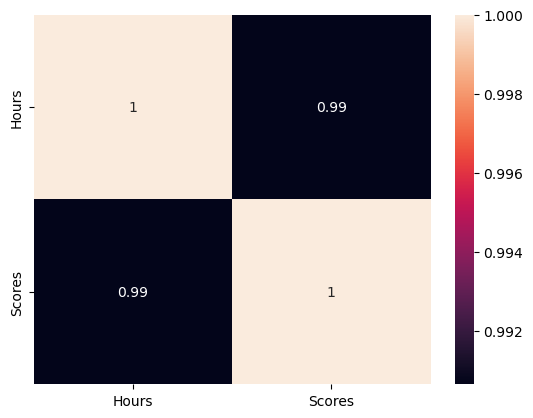

In [12]:
import seaborn as sns
sns.heatmap(stud_scores.corr(), annot=True)

**We can also plot a scatter plot to determine whether linear regression is the ideal method for predicting the Scores based on the Hours of study:**

<Axes: xlabel='Hours', ylabel='Scores'>

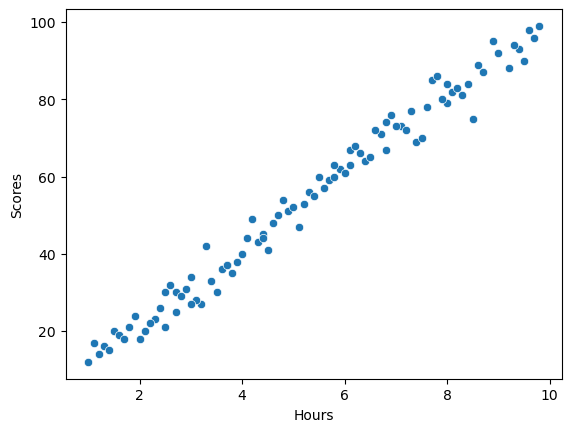

In [13]:
sns.scatterplot(x=stud_scores.Hours, y=stud_scores.Scores, data=stud_scores)

C:\Users\MANOJ KHANDELWAL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


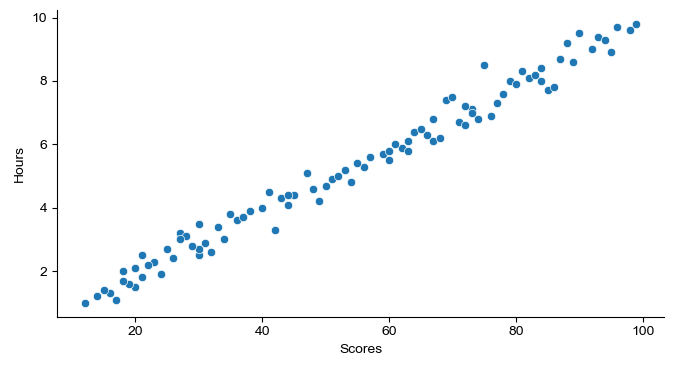

In [14]:
sns.relplot(x='Scores', y='Hours', data=stud_scores, 
            height=3.8, aspect=1.8, kind='scatter')
sns.set_style('dark')

## Splitting the data

Scikit-learn provides a train_test_split function for splitting the datasets into train and test subsets. We will split our dataset in the ratio of 70:30.

#### Create the feature matrix(X) and the response vector(y):

In [15]:
X = stud_scores.iloc[:,:-1].values # feature matrix
y = stud_scores.iloc[:,1].values # response vector

#### Split the data:

In [16]:
# SPLITTING THE DATA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(67, 1)
(29, 1)
(67,)
(29,)


### Fitting simple linear regression

Import the `LinearRegression` class from the `linear_model` to train the model. Instantiate an object of the class named regressor.

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

>The regressor object is also called an estimator. An estimator is any object that fits a model based on some training data and is capable of inferring some properties on new data. All estimators implement a fit method.

>The fit method takes the training data as the argument. We use this method to estimate some parameters of a model. For instance, we have passed in the X_train and the y_train – the independent and dependent variables. The model learns the correlations between the predictor and target variables.

### Getting the coefficient/slope and the intercept

Now that we have fitted the model, we can check the slope and the intercept of the simple linear fit.

**`Coefficient:`**

In [18]:
regressor.coef_

array([9.85328394])

>**The coefficient shows that, on average, the score increased by approximately  10.41 points for every hour the student studied.**

**`Intercept:`**

In [21]:
regressor.intercept_

1.9653093639946562

### Linear regression model fit line

The Seaborn regplot function enables us to visualize the linear fit of the model. It will draw a scatter plot of the variables and then fit the linear regression model. The regression line will be plotted with a 95% confidence interval.

<Axes: xlabel='Hours', ylabel='Scores'>

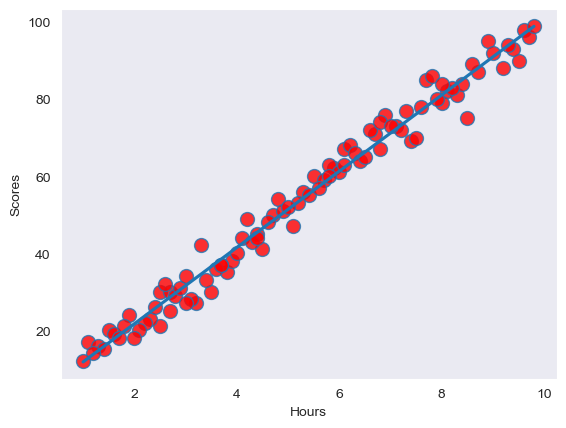

In [22]:
sns.regplot(x='Hours', 
            y='Scores', 
            data=stud_scores, 
            ci=None, 
            scatter_kws={'s':100, 'facecolor':'red'})

### Predicting test set result

At this point, the model is now trained and ready to predict the output of new observations. Remember, we split our dataset into train and test sets. We will provide test sets to the model and check its performance.

In [23]:
y_pred = regressor.predict(X_test)
y_pred

array([19.70122045, 90.64486482, 80.79158088, 65.02632658, 57.14369942,
       30.53983279, 82.76223767, 73.89428212, 27.58384761, 51.23172906,
       35.46647476, 59.11435621, 59.11435621, 50.24640067, 63.05566979,
       84.73289445, 45.3197587 , 77.8355957 , 33.49581797, 54.18771424,
       25.61319082, 53.20238585, 74.87961051, 98.52749197, 80.79158088,
       23.64253403, 81.77690927, 14.77457849, 41.37844512])

### Comparing the test values and the predicted values:

In [24]:
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df

,Actual,Predicted
0,21,19.701220
1,92,90.644865
2,79,80.791581
3,64,65.026327
4,57,57.143699
5,31,30.539833
6,83,82.762238
7,77,73.894282
8,32,27.583848
9,52,51.231729


### Checking the residuals:

In [25]:
residuals = y_test - y_pred
residuals

array([ 1.29877955,  1.35513518, -1.79158088, -1.02632658, -0.14369942,
        0.46016721,  0.23776233,  3.10571788,  4.41615239,  0.76827094,
       -2.46647476,  3.88564379,  0.88564379,  0.75359933,  4.94433021,
       -0.73289445, -0.3197587 ,  7.1644043 , -6.49581797,  1.81228576,
        0.38680918, -0.20238585, -5.87961051,  0.47250803,  3.20841912,
       -1.64253403,  0.22309073,  1.22542151, -1.37844512])

### Comparing the test data and the predicted values with a scatter plot:

AttributeError: PathCollection.set() got an unexpected keyword argument 'ci'

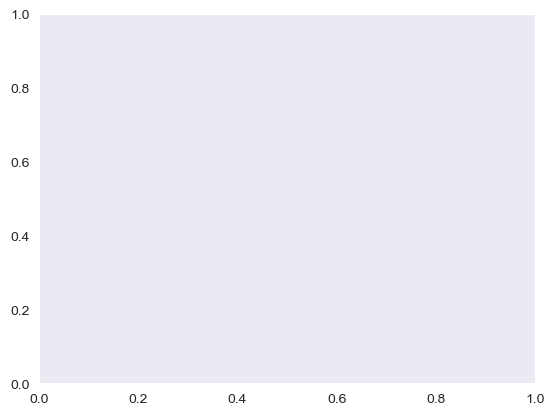

In [26]:
import matplotlib.pyplot as plt
sns.scatterplot(x=y_test, y = y_pred, ci=None, s=140)
plt.xlabel('y_test data')
plt.ylabel('Predictions')

### Evaluating linear regression models

There are various metrics in place that we can use to evaluate linear regression models. Since models can't be 100 percent efficient, evaluating the model on different metrics can help us optimize the performance, fine-tune it, and obtain better results. The metrics we can use include:

- Mean Absolute Error(MAE) calculates the absolute difference between the actual and predicted values. We get the sum of all the prediction errors and divide them by the total number of data points.

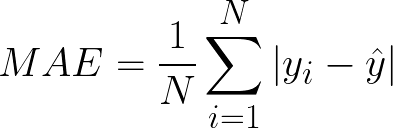

In [28]:
from sklearn.metrics import mean_absolute_error
print('MAE:', mean_absolute_error(y_test,y_pred))

MAE: 2.023574811018827


- Mean Squared Error(MSE): This is the most used metric. It finds the squared difference between actual and predicted values. We get the sum of the square of all prediction errors and divide it by the number of data points.

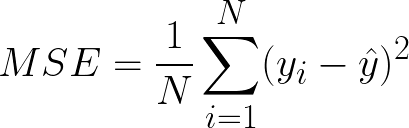

In [31]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 8.057550546734657


- Mean Squared Error(MSE): This is the most used metric. It finds the squared difference between actual and predicted values. We get the sum of the square of all prediction errors and divide it by the number of data points.

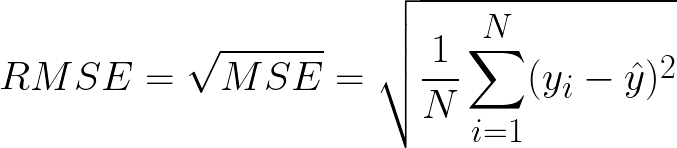

Since MSE is calculated by the square of error, the square root brings it back to the same level of prediction error. We need the NumPy square root function to compute it.

In [30]:
import numpy as np
from sklearn.metrics import mean_squared_error

print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 2.838582488978373


- R Squared(R2): R2 is also called the coefficient of determination or goodness of fit score regression function. It measures how much irregularity in the dependent variable the model can explain. The R2 value is between 0 to 1, and a bigger value shows a better fit between prediction and actual value. 

From the `sklearn.metrics` module, import the `r2_score` function, and find the goodness of fit of the model.

In [32]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.9855989798962834


## Multicollinearity in regression analysis

Multicollinearity in regression analysis occurs when two or more predictors or independent variables are highly correlated such that they do not give unique or independent information in the regression model. The independent variables should be independent; thus, if the degree of correlation between them is high, problems can occur when fitting and interpreting the regression model.

For instance, if we wanted to predict the maximum verticle jump of an athlete with predictor variables like shoe size and height, we will encounter an instance of high colinearity between the shoe size and the height, as usually, tall people tend to have larger shoe sizes.

The main goal of regression analysis is to isolate the relationship between each independent variable and the dependent variable. We interpret regression coefficients as the mean change in the dependent variable for each 1 unit change in an independent variable when all other independent variables are constant.

So if we cannot change the value of a given predictor variable without changing another predictor variable, then there is a problem caused by high collinearity.

>**The most common way to detect multicollinearity is by using the variance inflation factor (VIF), which measures the correlation and strength of correlation between the predictor variables in a regression model.**

## Dummy variables and Dummy variable trap

### Dummy variables

Typically in linear regression, we carry out linear regression with numeric data. Numeric data is easy to handle for linear regression. However, sometimes we may use categorical data as predictor variables to make predictions, for example, Gender(male, female).

Categorical data can not be used directly for regression and needs to be transformed into numeric data. The solution is to use dummy variables. We create dummy variables for regression analysis that take on one of two values: zero or one.

**Take, for example, this dataset:**

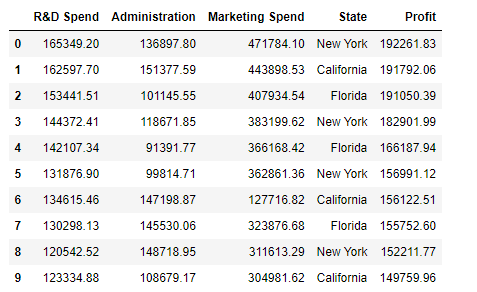

**If we were to use the State category, we would need to convert it into some dummy variable:**

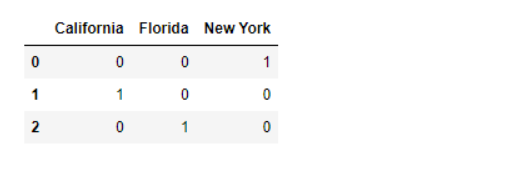

**`To do this, Scikit-learn provides LabelEncoder and OneHotEncoderutility classes.`**

### Dummy variable trap

A dummy variable trap is a scenario where we have highly correlated attributes(Multicollinear), and one variable predicts the value of other variables.

The number of dummies we have to create equals K-1, where K represents the number of different values the categorical variable can take. When we use the OneHotEncoder utility class, one variable can be predicted by other variables, which we can exclude(K-1).

For instance, from the sample dataset we have displayed above, the State category can take up to 3 variables(California, Florida, and New York). So we will create K-1 = 3-1= 2 dummy variables to get the following result:

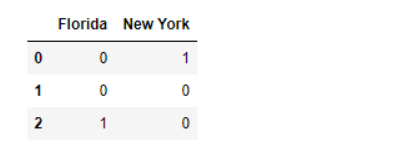

## Building a multiple linear regression model with Scikit-learn

This section will focus on multiple independent variables to predict a single target.

Since we have p predictor variables, we can represent multiple linear regression with the equation below:

    Y = β0 + β1X1 + β2X2 + … + βpXp + ε
    
**Where:**

    Y: The response variable.
    Xj: The jth predictor variable.
    βj: The average effect on Y of a one unit increase in Xj, holding all other predictors fixed.
    ε: The error term.    

### Loading libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

### Loading dataset

In [2]:
startups_df = pd.read_csv('50_Startups.csv')
startups_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


**Info:**

In [3]:
startups_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


**Statistical overview of  data:**

In [4]:
startups_df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


**Correlation and heatmap:**

In [6]:
startups_df.drop(columns='State').corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

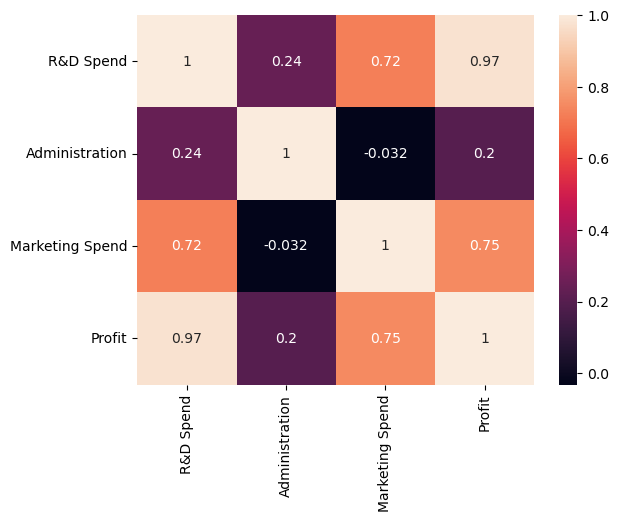

In [8]:
sns.heatmap(startups_df.drop(columns='State').corr(),
           annot=True)

### Extracting independent variables(X) and dependent(y)

Since we are predicting profits, the profit variable will be the dependent variable and the rest independent variables.

In [9]:
X = startups_df.iloc[:, :-1]    # Independent varibles
y = startups_df.iloc[:, -1]     # dependent variable
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


### Encoding dummy variables

As we can observe, we have a State column with categorical data. We need to assign dummy variables to it as we can not directly use categorical data for regression. We will use the OneHotEncoder utility classes from Scikit-learn sklearn.preprocessing module.

### One hot encoding:

In [10]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(drop='first') # drop the first dummy variable (K-1)

enc_df = pd.DataFrame(enc.fit_transform(X[['State']]).toarray())
enc_df.columns = ['Florida', 'New York']
# merge with main df on key values
X = X.join(enc_df)
X.head()

,R&D Spend,Administration,Marketing Spend,State,Florida,New York
0,165349.20,136897.80,471784.10,New York,0.0,1.0
1,162597.70,151377.59,443898.53,California,0.0,0.0
2,153441.51,101145.55,407934.54,Florida,1.0,0.0
3,144372.41,118671.85,383199.62,New York,0.0,1.0
4,142107.34,91391.77,366168.42,Florida,1.0,0.0


#### We can now drop the State column:

In [11]:
X = X.drop('State', axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0.0,1.0
1,162597.70,151377.59,443898.53,0.0,0.0
2,153441.51,101145.55,407934.54,1.0,0.0
3,144372.41,118671.85,383199.62,0.0,1.0
4,142107.34,91391.77,366168.42,1.0,0.0


### Splitting data into train and test sets

As before, we will split the data with the train_test_splitfunction from Scikit-learn.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.30, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35, 5)
(15, 5)
(35,)
(15,)


### Fitting the simple linear regression to the Training Set

Create an object of linear regression and train the model with the training datasets.

In [13]:
regressor = LinearRegression() # Instatiate LinearREgression object
regressor.fit(X_train, y_train) # fit the model

LinearRegression()

### Getting the coefficients and the intercept

Getting the coefficients enables us to form an estimated multiple regression model. Let's have a look:

In [16]:
print(regressor.coef_)
print()
print(regressor.intercept_)

[7.90840255e-01 3.01968165e-02 3.10148566e-02 4.63028992e+02
 3.04799573e+02]

42403.8708705279


### Predicting test results

Predict the output of new observations with the trained model.

In [17]:
y_pred = regressor.predict(X_test)
y_pred[:5]

array([104282.76472172, 132536.88499212, 133910.85007766,  72584.77489417,
       179920.9276189 ])

### Compare the actual values and predicted values:

In [18]:
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df

,Actual,Predicted
28,103282.38,104282.764722
11,144259.40,132536.884992
10,146121.95,133910.850078
41,77798.83,72584.774894
2,191050.39,179920.927619
27,105008.31,114549.310792
38,81229.06,66444.432613
31,97483.56,98404.968401
22,110352.25,114499.828086
4,166187.94,169367.506399


### Checking the residuals:

In [19]:
residuals = y_test - y_pred
residuals

28    -1000.384722
11    11722.515008
10    12211.099922
41     5214.055106
2     11129.462381
27    -9541.000792
38    14784.627387
31     -921.408401
22    -4147.578086
4     -3179.566399
33      256.294600
35     8438.838171
26    -5216.454055
34     6293.610215
18    -3753.562501
Name: Profit, dtype: float64

### Compare the actual values and predicted values with a scatter plot:

Text(0, 0.5, 'Predictions')

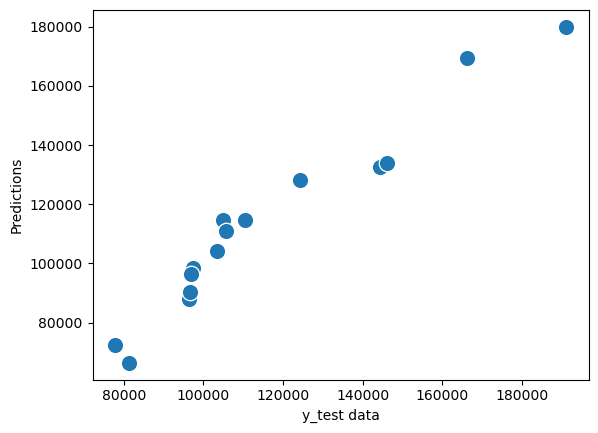

In [21]:
import matplotlib.pyplot as plt
sns.scatterplot(x=y_test, y = y_pred, s=140)
plt.xlabel('y_test data')
plt.ylabel('Predictions')

### Evaluating the model

We can check the goodness of fit or the score of our model with the R2 (r2_score) metric.

In [22]:
score = r2_score(y_test, y_pred)
score

0.9358680970046243